### Quiz:


1: One of the method is distribution-based clustering, this method is cluster data with distributions, so as the distance from the disterbution's center increase, the probability that the point belongs to the distribution decrease, we can compare each point the probability to each center, and cluster them with the greatest value. The pro of this method is very fast calculate but cons is have to know the type of distribution.

2: the function K-mean attempting to minimize the distance between all point to the correponing centorid.

3: 
a)Dataset is not globular (circle in R2) in shape, k mean assume the clusters group like a circle in 2d, if the dataset is not, for example like a concave dataset, K mean may fail.

b)K mean assumes the cluster have similar size, if clusters have significant differences in the size of the clusters k mean may fail

c)Outliers random generate like Q2.8, K mean will try to make all the outlier into cluster.

d)Cluster are not linerly separable, since K mean is a linear method with calculate the linear distance between center to the point.


4: 
K-median: uses median instead of the centroid

k-medoids: centroid choice from the dataset

Gaussian mixtures: Use ellipsoid instead of spheres


5: Inductive is observe some examples and conclude general laws while tranductive is have to observe all the dataset and build the model. Inductive can apply to any data once trained, so example is K-mean, for new data we don't need to retrain and able to conclue the point is for which cluster by calculate the distance form the new point to all the centroid. DBSCAN is a example of tranductive, if a new data point updata, we need to see the distance from the new point to all training data, this may have great impact for the previous model, for example if min_sample is 4 and we know 3 noise that is very close to each other but because is not enough points to form a cluster, however if we updata one point that is close to them, these 4 point will no longer noise and form a new cluster.


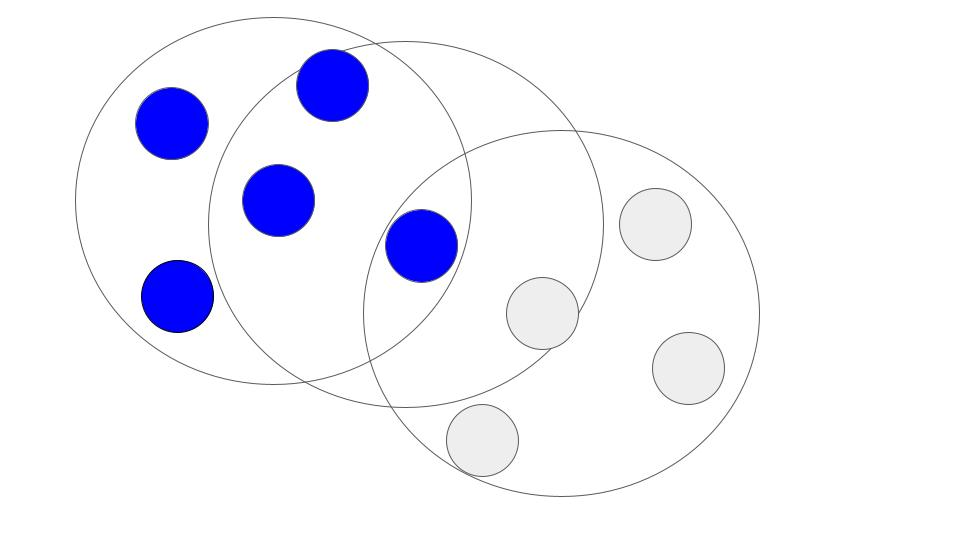

Q6, For min_sample = 5, so we see the points above, the middle is a boundary point for two cluster, but because the label is unique, so the four point in right can form a different cluster but with less point than the min_sample

In [ ]:
import random 
import numpy as np
from numpy.random import uniform 
import warnings 

import pandas as pd
import plotly.express as px

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn import metrics

import matplotlib.pyplot as plt

%matplotlib inline

Adjusting options for the inline figures

In [ ]:
# Adjusting the resolution and format of the inline images

# Possible options: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’
%config InlineBackend.figure_formats = ["retina"]
# %config InlineBackend.figure_formats = ["svg"]

In [ ]:
# Setting the dpi of the inline figures
# plt.rcParams["figure.dpi"] = 200

In [ ]:
# Available styles (these will change the colormap as well)

# Colorblind options; uncomment to select an option:
# plt.style.use("seaborn-colorblind")
# plt.style.use("tableau-colorblind10")

# To print all the possible options:
# plt.style.available

In [ ]:
# Adjusting the colormap (also modified by the commands above)
# plt.rcParams["image.cmap"] = "cividis"

In [ ]:
def scatter_blobs(X,y,title):
    plt.scatter(X[:, 0], X[:, 1], c=y) 
    plt.title(title) 
    plt.show()

# K-means in scikit-learn 

We use the Gaussian blobs dataset to showcase K-means in scikit-learn.

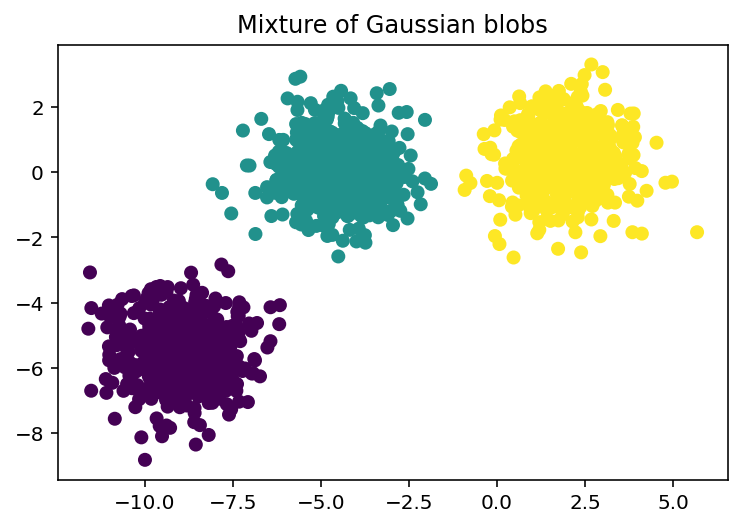

In [ ]:
n_samples = 1500
random_state = 170

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

scatter_blobs(X,y,"Mixture of Gaussian blobs")

KMeans(n_clusters=3)
[2 2 0 ... 1 1 1]


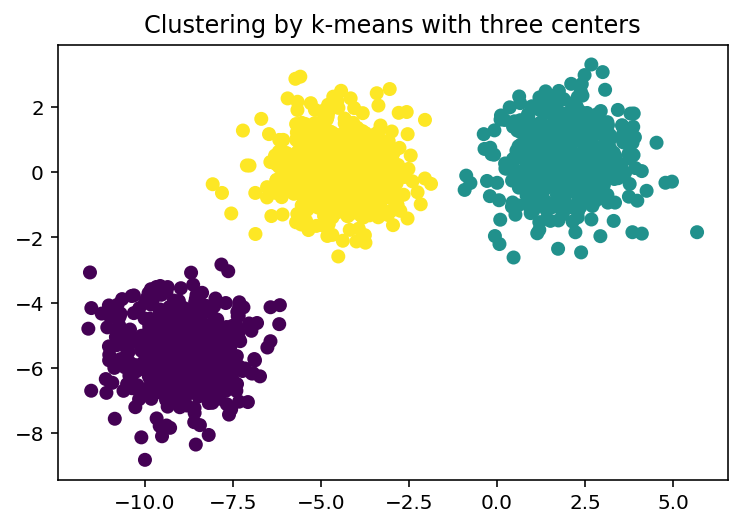

In [ ]:
sklearn_kmean = KMeans(n_init=10, n_clusters=3)
print(sklearn_kmean)
sklearn_kmean.fit(X)
print(sklearn_kmean.labels_)
scatter_blobs(X,sklearn_kmean.labels_,"Clustering by k-means with three centers")

# Q1 Implementing k-means from scratch

In this question, you are asked to implement the k-means Clustering Algorithm. The k-means algorithm requires you to specify the number k of clusters/groups a priori, as shown in above sklearn k-means implementation. 

The center of each cluster is a centroid. These centers are randomly initialized. After the initialization, we perform the following iterations to optimize the locations of the k centroids: 


```
repeat until convergence: 
     1. Calculate the distance from each point to each centroid.
     2. Assign each point to its nearest centroid. 
     3. Centroids are shifted to be the average value of the points belonging to the cluster. 
     (convergence criteria: the location of the centroids stops changing.) 
```

To measure how well a given dataset is clustered by k-means, we use a quantity called `inertia`, which is calculated by summing the squares of the distance between each data point and its corresponding centroid. A good model is one with a small number of clusters and small inertia.

Although we can use different measures of distance, for this homework, we only use the Euclidean distance as our metric. You are given a helper function `euclidean_dist2(point, data)`, which returns the Euclidean distance squared between a point to a dataset. 

You are provided the first part of the class `my_KMeans`, which you will need to complete. You are already given the `__init__` method, and the first part of `fit_transform(self, X_train)`. You should implement the rest of the member function to return the following quantities in this order: the location of the centroids with size `(n_clusters, m)`, the centroid indices with size `(n, )` (i.e., the index of the centroid the `X_train` belongs to), and inertia. We assume that `X_train` has size `(n, m)`.

In [ ]:
def euclidean_dist2(point, data):
    """
    Squared Euclidean distance between data and point.
    Dimensions:
    data: (n,m)
    point: (m,)
    output: (n,)
    """
    return np.sum((point - data)**2, axis=1)

In [ ]:
class my_KMeans:

    def __init__(self, n_clusters=5, max_iter=300, init=None):
        self.n_clusters = n_clusters 
        self.max_iter = max_iter 
        self.init = init

    def fit_transform(self, X_train):
        if self.init is not None:
            centroids = self.init 
        else: 
        # Randomly initialize the centers using the 'sklearns++' technique, which 
        # selects the initial cluster centroids using sampling based on an empirical probability 
        # distribution of the points’ contribution to the overall inertia. This technique
        # speeds up convergence.
            centroids = [random.choice(X_train)]
            for _ in range(self.n_clusters-1):
                # Calculate distances from points to the centroids
                dists = np.sum([np.sqrt(euclidean_dist2(centroid, X_train)) for centroid in centroids], axis=0)
                # Normalize the distances
                dists /= np.sum(dists)
                # Choose point based on their distances
                new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
                centroids += [X_train[new_centroid_idx]]
        n = X_train.shape[0]
        m = X_train.shape[1]
        iteration = 0
        while iteration <= self.max_iter:
            iteration += 1
            # pick the centroid for each x
            c_x_c = [] # matrix with dist for each centroids
            for i in range(len(centroids)):
                c_x_c.append(euclidean_dist2(centroids[i], X_train))
                #print(c_x_c)
            c_arr = np.asarray(c_x_c)
            idx = np.argmin(c_arr, axis=0)
            # update centroid
            new_centroids = []
            inertia = 0
            for i in range(len(centroids)):
                new_centroids.append(np.mean(X_train[idx == i,:], axis = 0))
            for i in range(len(centroids)):
                inertia += np.sum((np.square(np.linalg.norm(X_train[idx == i, :] - new_centroids[i], axis = 1))))
            pre_centroids = centroids
            centroids = new_centroids
            if np.linalg.norm(np.asarray(centroids) - np.asarray(pre_centroids))**2 <= 1e-3:
                return centroids, idx, inertia
        return centroids, idx, inertia
        # start your implementation here!
        # assign idx


To evaluate your implementation, compare the output of your k-means implementation with the k-means implementation from the Sklearn library. First, we should notice that the k-means algorithm is not deterministic due to the random initialization of the centroids. However, k-means becomes deterministic after we fix the initialization. 

In [ ]:
n_samples = 300 

# number of failures 

num_of_mismatches = 0 

for i in range(100): 

    # Generating random Gaussian blobs dataset 
    n_centers = random.randint(2,5) 
    X, y = make_blobs(n_samples=n_samples, centers=n_centers) 

    # Randomly initialize the centers using the 'sklearns++' technique, which 
    # selects initial cluster centroids using sampling based on an empirical probability 
    # distribution of the points’ contribution to the overall inertia. This technique
    # speeds up convergence. 
    init_centroids = [random.choice(X)]
    for _ in range(n_centers-1):
        # Calculate distances from points to the centroids
        dists = np.sum([np.sqrt(euclidean_dist2(centroid, X)) for centroid in init_centroids], axis=0)
        # Normalize the distances
        dists /= np.sum(dists)
        # Choose remaining points based on their distances
        new_centroid_idx, = np.random.choice(range(len(X)), size=1, p=dists)
        init_centroids += [X[new_centroid_idx]]

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sklearn_kmean = KMeans(n_clusters=n_centers, init=np.asarray(init_centroids), tol=1e-10) 
        sklearn_kmean.fit(X)
    my_kmean = my_KMeans(n_clusters=n_centers, init=init_centroids)
    centroids, _, my_kmean_inertia = my_kmean.fit_transform(X) 

    if i % 10 == 0: 
        print(i) 

    if abs(sklearn_kmean.inertia_ - my_kmean_inertia) > 1: 
        num_of_mismatches += 1 
        print('sklearn_kmean.inertia:{:.3f}, my_kmean_inertia:{:.3f}'.format(
            sklearn_kmean.inertia_, my_kmean_inertia))
        assert num_of_mismatches < 5, 'too many mismatches!'
        
# You may see a few
# "[kmeans] empty cluster at iteration ..."
# and
# sklearn_kmean.inertia:XXX, my_kmean_inertia:XXX
# because of poor convergence due to a bad initialization.
# If your code works correctly, the number of mismatches should be less than 5.

0
10
20
sklearn_kmean.inertia:535.383, my_kmean_inertia:537.611
30
40
50
60
70
80
90


# Q2 Select the optimal $k$ by looking at the graph of inertia vs $k$

For this question, you should implement the function` plot_inertia(X)`. This function will take in an input `X` and run your implementation `my_KMeans` multiple times with different hyperparameters `k` (i.e., the number of clusters). You should record the inertia value for different `k`, and make a plot of `k` vs `inertia`. Observe your graph and comment on how you should select the optimal value of `k` for k-means based on the graph. Is the optimal value you found close to the ground truth value? 

In [ ]:
%matplotlib inline

In [ ]:
def plot_inertia(X): 
    # start your implementation here!
    k_max = 20
    inertia_list = []
    for i in range(k_max):
      my_kmean = my_KMeans(n_clusters=i, init=None)
      centroids, _, my_kmean_inertia = my_kmean.fit_transform(X)
      inertia_list.append(my_kmean_inertia)
    plt.plot([i for i in range(k_max)], inertia_list)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.show()
    k = np.argmin(inertia_list)
    print(k)
    my_kmean = my_KMeans(n_clusters=k, init=None)
    centroids, _, my_kmean_inertia = my_kmean.fit_transform(X)


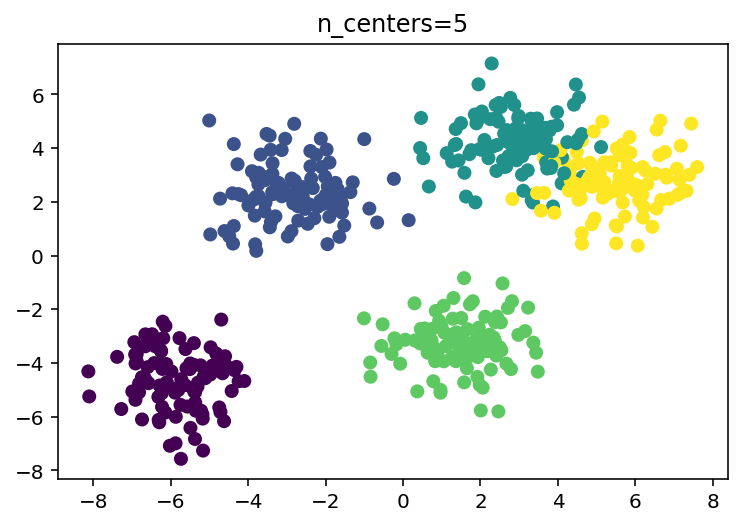

In [ ]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=5)
scatter_blobs(X,y,"n_centers=5")

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


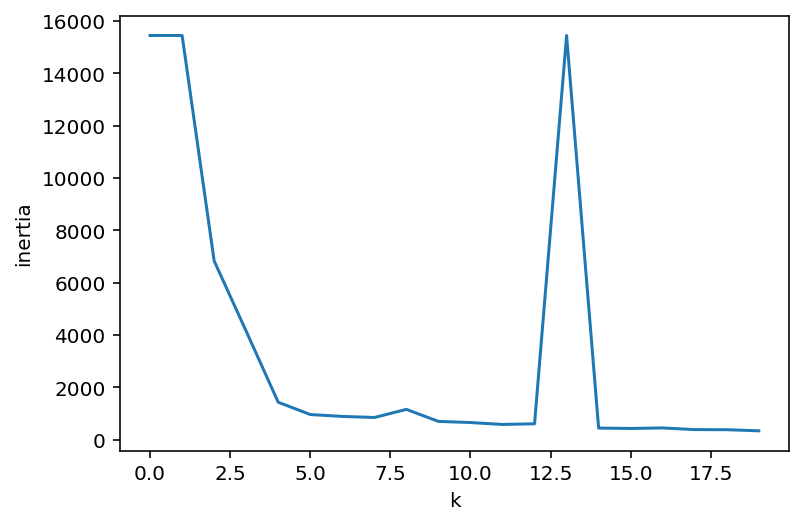

19


In [ ]:
plot_inertia(X)

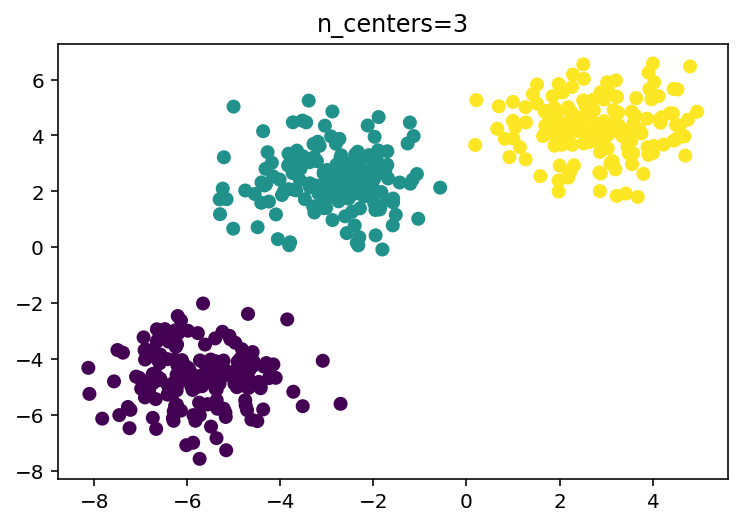

In [ ]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=3) 
scatter_blobs(X,y,"n_centers=3")

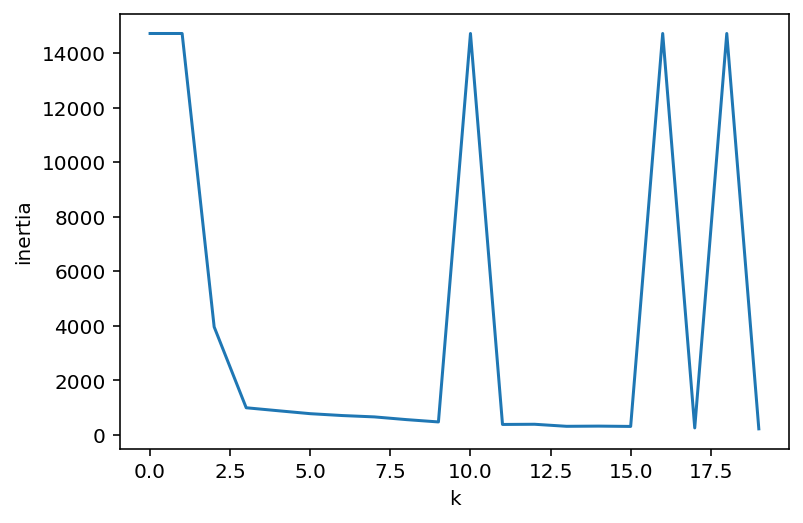

19


In [ ]:
plot_inertia(X)

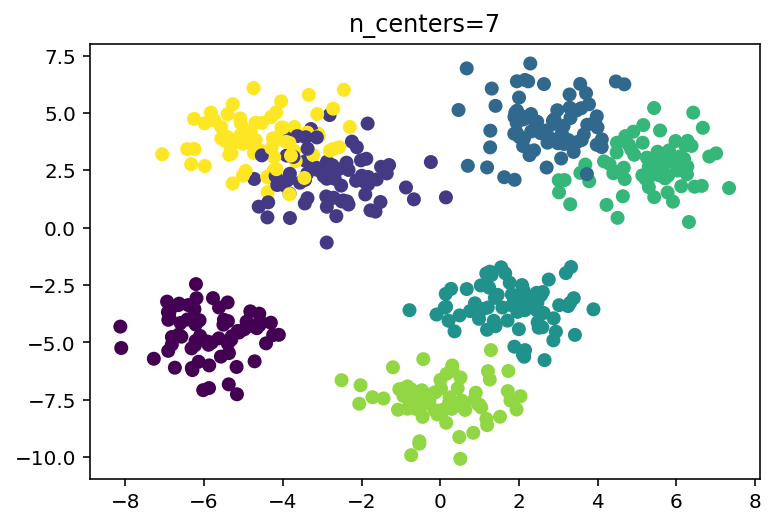

In [ ]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=7) 
scatter_blobs(X,y,"n_centers=7")

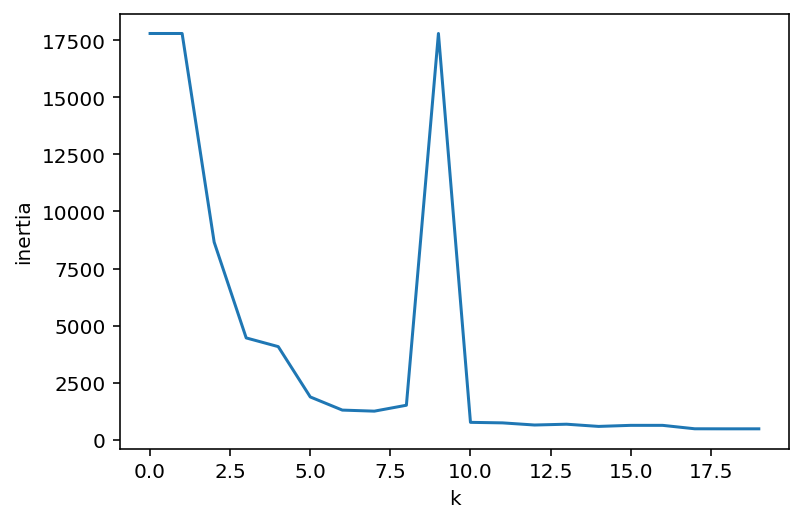

18


In [ ]:
plot_inertia(X)

We can observe that the inertia decresing as k incresing while the k is less than the parameter of 'center' in make_blobs function, and inertia will maintain in some level until reach to some k that is larger than 'center'. SO will be researable to choice k at the point that slope is first become about zero.

# DBSCAN clustering algorithm 

Let's generate four Gaussian blobs with a line of points connecting two of them. This will be used to illustrate the usage of DBSCAN in sklearn. 

In [ ]:
def make_blobs_with_line():
    X, labels = make_blobs(n_samples=500, centers = [[1, 2], [1, 3], [2.5, 3], [6,0]], 
                           cluster_std = 0.2, random_state=216)

    n_point_line = 64
    x0 = np.linspace(6,1,n_point_line)
    y0 = np.linspace(0,3,n_point_line)
    X_ = np.reshape([x0,y0],(2,n_point_line))

    X = np.concatenate((X_.T,X),axis=0)
    labels = np.concatenate(([-1] * n_point_line,labels),axis=0)
    
    return X, labels

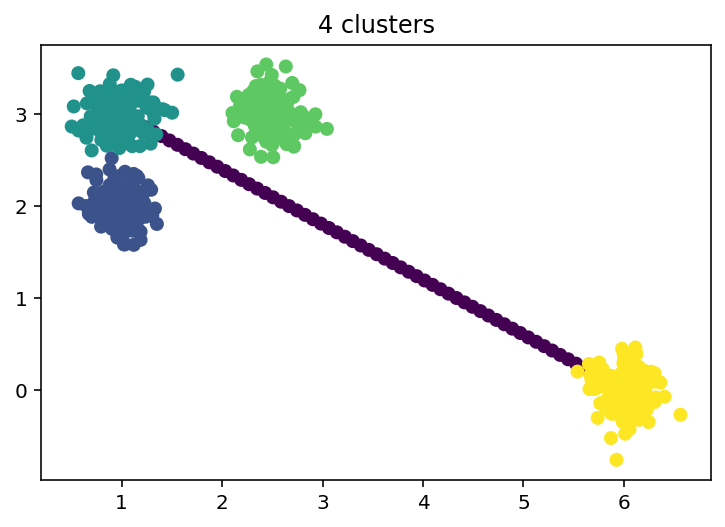

In [ ]:
X, labels_truth = make_blobs_with_line()
scatter_blobs(X,labels_truth,"4 clusters")

First, run DBSCAN with the default parameters. 

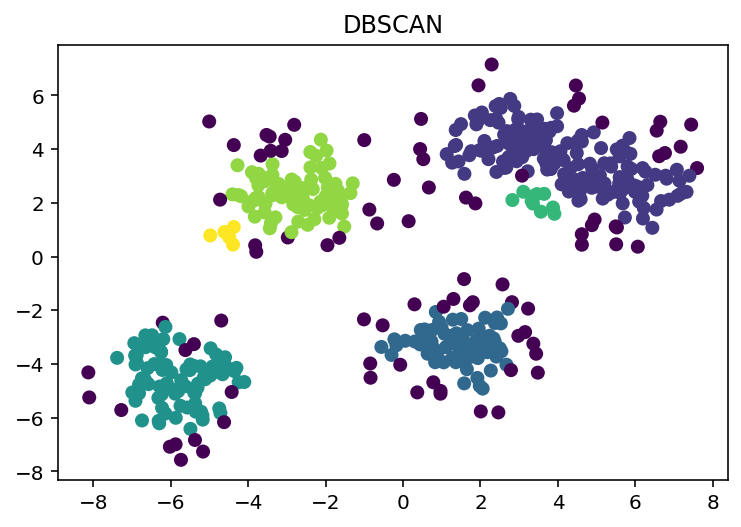

Estimated number of clusters: 6
Estimated number of noise points: 88


In [ ]:
db = DBSCAN().fit(X)
scatter_blobs(X,db.labels_,"DBSCAN")

n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Even though there are four clusters according to `make_blobs`, the default values in DBSCAN lead to a single cluster.

# Q3 DBSCAN hyperparameter search

There are two important hyperparameters `eps`, and `min_sample` you can choose to determine how many clusters you may end up with. Implement the function `grid_search()` to perform a grid search of different values of `eps` and `min_sample` to obtain the best clustering. 

In `grid_search()`, you should print out the number of clusters and the number of noise points after each DBSCAN computation. 

Use the function `plot_min_samples()` to graph the result of the clustering. 

A good pair `(eps, min_samples)` should give us the correct number of the clusters and very few noise points. 

In [ ]:
class DBSCAN_hyperparameters:

    def __init__(self): 
        self.data_plotly = {"eps": [], "min_samples": [], "point_id": [], "x": [], "y": [], "label": [] }

    def write(self, X, eps, min_samples, labels): 
        """
        Saving the labels and other data to self.data_plotly.
        """
        for point_id, (X_, label) in enumerate(zip(X, labels)):
            self.data_plotly["eps"].append(eps)
            self.data_plotly["min_samples"].append(min_samples)
            self.data_plotly["point_id"].append(point_id)
            self.data_plotly["x"].append(X_[0])
            self.data_plotly["y"].append(X_[1])
            self.data_plotly["label"].append(label)
            
    def finalize(self):
        self.df = pd.DataFrame(self.data_plotly) # convert to panda dataframe
        return self
            
    def plot_min_samples(self, min_samples):
        """
        min_samples: integer scalar; this should be one of the values 
                     previously passed to search() in the list eps_ranges.
        """
        
        assert hasattr(self, 'df') and not self.df.empty, 'You need to run grid_search() before calling this function.'
        
        return px.scatter(self.df[self.df["min_samples"] == min_samples], 
                          title = f"min_samples = {min_samples}", 
                          x="x", y="y", animation_frame="eps", animation_group="point_id",
                          color="label", width=610, height= 600) 

In [ ]:
def grid_search(X, eps_ranges=[0.1, 0.5], min_samples_ranges=[2, 10]):
    """
    Grid search to identify the best eps and min_samples.
    eps_ranges and min_samples_ranges should be lists of values to be used in the grid search.
    """
    
    db_hp = DBSCAN_hyperparameters() # required for plotting later on
    min_n_noise = [1000, 999, 998]
    cluster_for_min =[0, 0, 0]
    eps_min_sample =[[0, 0],[0, 0],[0,0]]
    counter = 0
    for min_samples in min_samples_ranges: 
        for eps in eps_ranges:        

            # Start your implementation here
            clustering = DBSCAN(eps=eps, min_samples = min_samples).fit(X)
            labels = clustering.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)
            print("Estimated number of clusters: %d" % n_clusters_)
            print("Estimated number of noise points: %d" % n_noise_)
            if n_noise_ <= min_n_noise[0]:
                min_n_noise[0] = n_noise_
                cluster_for_min[0] = n_clusters_
                eps_min_sample[0] = [eps, min_samples]
            elif n_noise_ <= min_n_noise[1]:
                min_n_noise[1] = n_noise_
                cluster_for_min[1] = n_clusters_
                eps_min_sample[1] = [eps, min_samples]
            elif n_noise_ <= min_n_noise[2]:
                min_n_noise[2] = n_noise_
                cluster_for_min[2] = n_clusters_
                eps_min_sample[2] = [eps, min_samples]

            # End your implementation here!
            
            # labels should be set equal to the DBSCAN labels you just computed.

            db_hp.write(X, eps, min_samples, labels) # save data for future plotting
    print('The top 3 choice for min noise', 'min noise', min_n_noise, 'cluster for min', cluster_for_min, 'eps and min samples',eps_min_sample)
    return db_hp.finalize() # return DBSCAN_hyperparameters for plotting with plot_min_samples()

# Q4 DBSCAN hyperparameter exploration and plotting

Test your implementation by running the following cell after you have filled in the proper values in a list for `chosen_eps_ranges` and `chosen_min_samples_ranges`. 

What pairs of the value `(eps, min_sample)` give you the best results? 

In [ ]:
X, labels_truth = make_blobs_with_line()

In [ ]:
chosen_eps_ranges = [0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22] # Please fill in the empty list 
chosen_min_samples_ranges = [2, 5, 10, 20]  # Please fill in the empty list 

DBSCAN_params = grid_search(X, chosen_eps_ranges, chosen_min_samples_ranges) 

Estimated number of clusters: 39
Estimated number of noise points: 142
Estimated number of clusters: 21
Estimated number of noise points: 92
Estimated number of clusters: 8
Estimated number of noise points: 23
Estimated number of clusters: 5
Estimated number of noise points: 15
Estimated number of clusters: 2
Estimated number of noise points: 8
Estimated number of clusters: 2
Estimated number of noise points: 5
Estimated number of clusters: 2
Estimated number of noise points: 4
Estimated number of clusters: 2
Estimated number of noise points: 4
Estimated number of clusters: 2
Estimated number of noise points: 4
Estimated number of clusters: 18
Estimated number of noise points: 274
Estimated number of clusters: 7
Estimated number of noise points: 156
Estimated number of clusters: 4
Estimated number of noise points: 104
Estimated number of clusters: 4
Estimated number of noise points: 79
Estimated number of clusters: 4
Estimated number of noise points: 62
Estimated number of clusters: 3


In [ ]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[0])

In [ ]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[1])

In [ ]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[2])

we see the best result is eps=0.2 and min_samples = 10, this combination is the same number as my function output which have the least noise in the 3rd place. For obervation, if we use the top 2 least noise parameter (eps and min samples = [0.22, 5], [0.22, 10]) to run the DBSCAN, the result is not great, we see the reseason is for min_sample = 5, this allow the outliers in the middle (the line in the middle show in the plot) integrate with another cluster, so when choice the best combination we can start with the top 3 or top 10 combination that have least noise point, since the top 1 usually is not correct.

# Q5 Core, Border, Noise points in DBSCAN 

In the DBSCAN algorithm, the points can be classified as `core`, `border`, or `noise`.

A point p is regarded as a `core` point if at least `min_samples` are within distance `eps` of it (including p). 

A point q is a `border` point if it is within a `eps` neighborhood of a `core` point but itself is not a `core` point. 

A point o is a `noise` point if it is neither a `core` point nor a `border` point. 

See also the lecture slides for the definition of these terms.

Implement the function `DBSCAN_point_types(X, eps, min_samples)` using the function `DBSCAN` in sklearn to return the labels of the input `X`, the indices of the core points, the indices of the border points, and the indices of the noise points. All return variables should be of type `list`.

In [ ]:
def DBSCAN_point_types(X, eps, min_samples): 
    # Start your implementation here.
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = clustering.labels_
    core_idx = clustering.core_sample_indices_
    noise_idx = []
    border_idx = []
    for i in range(len(clustering.labels_)):
        if labels[i] == -1:
            noise_idx.append([i])
        else:
            if i not in core_idx:
                border_idx.append([i])
        
    return labels, core_idx, border_idx, noise_idx

In [ ]:
def draw_DBSCAN_point_types(X, labels, core_sample_indices, border_indices, noise_indices):
  
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[core_sample_indices] = True 

    border_samples_mask = np.zeros_like(labels, dtype=bool)
    border_samples_mask[border_indices] = True 
    
    noise_samples_mask = np.zeros_like(labels, dtype=bool)
    noise_samples_mask[noise_indices] = True     

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise point.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14
        )

        xy = X[class_member_mask & border_samples_mask] if k != -1 else X[class_member_mask & noise_samples_mask]
        plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6
        )
    plt.title(f"Number of DBSCAN clusters: {len(unique_labels)-1}")
    plt.show()
    
    print(f"Number of DBSCAN clusters: {len(unique_labels)-1:4}")
    print(f"Number of core points:     {len(core_sample_indices):4}")    
    print(f"Number of border points:   {len(border_indices):4}")    
    print(f"Number of noise points:    {len(noise_indices):4}")
    print(f"Number of points:          {X.shape[0]:4}")    

You are given the above function `draw_DBSCAN_point_types`. Run the following cell to test your implementation. 



In [ ]:
X, labels_truth = make_blobs_with_line()

In [ ]:
labels, core_sample_indices, border_indices, noise_indices = DBSCAN_point_types(X, 0.15, 10)
assert X.shape[0] == len(noise_indices) + len(border_indices) + len(core_sample_indices), "Inconsistency between the size of the set and the number of core+border+noise points"

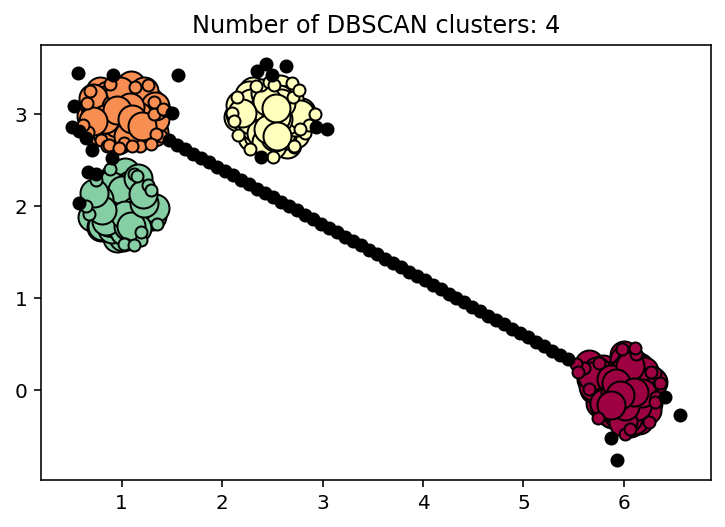

Number of DBSCAN clusters:    4
Number of core points:      418
Number of border points:     71
Number of noise points:      75
Number of points:           564


In [ ]:
draw_DBSCAN_point_types(X, labels, core_sample_indices, border_indices, noise_indices)

# Q6 Anisotropically distributed blobs

You were given the following code to generate anisotropically distributed blobs. Run both the k-means algorithm you implemented in Q1 and DBSCAN from sklearn with the best hyperparameters you can find. You should use `DBSCAN_hyperparameter_search` for hyperparameter search for DBSCAN. 

Plot the clusters generated by DBSCAN and k-means. Comment and describe your observations. Which algorithm may be more suitable for this example and why?

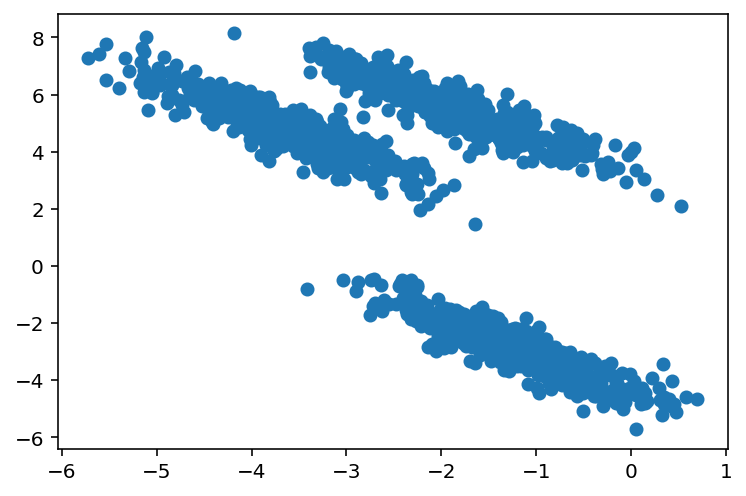

In [ ]:
n_samples = 1500
random_state = 172
transformation = [[0.60834549, -0.5], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
plt.scatter(X_aniso[:,0], X_aniso[:,1])

In [ ]:
chosen_eps_ranges = [0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22]            # student should fill in those value 
chosen_min_samples_ranges = [2, 5, 10, 20]    # student should fill in those value  

DBSCAN_params = grid_search(X_aniso, chosen_eps_ranges, chosen_min_samples_ranges) 

Estimated number of clusters: 248
Estimated number of noise points: 514
Estimated number of clusters: 165
Estimated number of noise points: 301
Estimated number of clusters: 110
Estimated number of noise points: 187
Estimated number of clusters: 73
Estimated number of noise points: 124
Estimated number of clusters: 54
Estimated number of noise points: 90
Estimated number of clusters: 36
Estimated number of noise points: 69
Estimated number of clusters: 26
Estimated number of noise points: 58
Estimated number of clusters: 16
Estimated number of noise points: 42
Estimated number of clusters: 14
Estimated number of noise points: 34
Estimated number of clusters: 37
Estimated number of noise points: 1220
Estimated number of clusters: 52
Estimated number of noise points: 807
Estimated number of clusters: 33
Estimated number of noise points: 528
Estimated number of clusters: 23
Estimated number of noise points: 355
Estimated number of clusters: 19
Estimated number of noise points: 239
Estimat

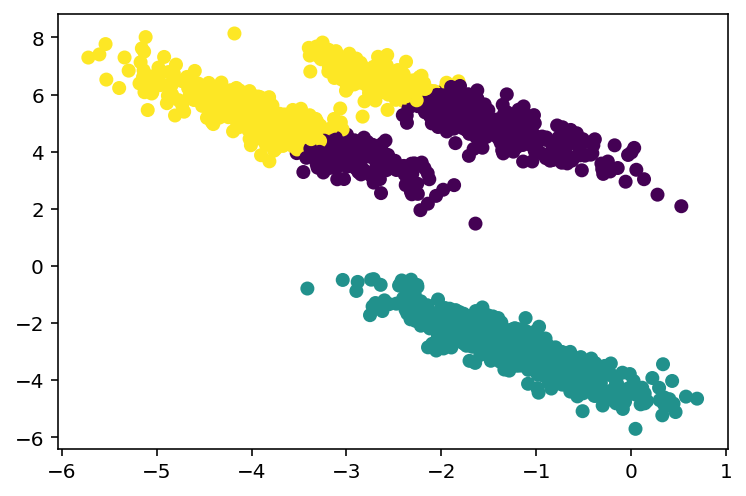

In [ ]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_aniso) 
plt.scatter(X_aniso[:,0], X_aniso[:,1], c = centroid_idx)

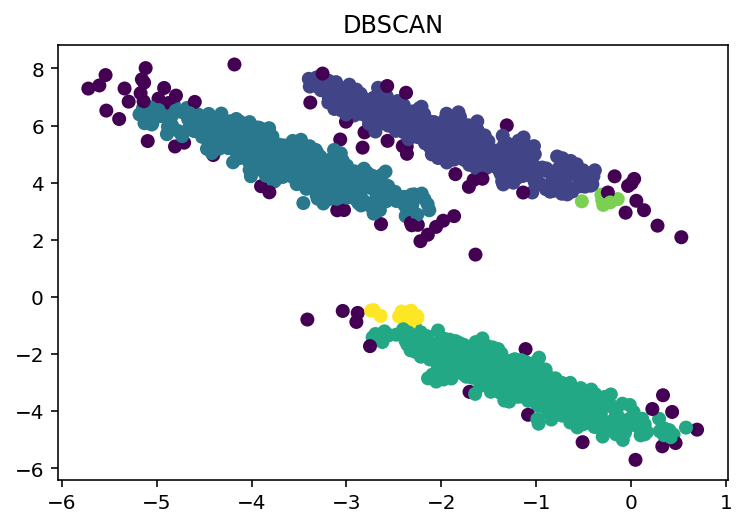

In [ ]:
db = DBSCAN(eps= 0.22,min_samples= 5).fit(X_aniso) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_aniso,db.labels_,"DBSCAN")

we see in this case the k mean method fail, the reason is k mean cluster data within a circle (within the radian) in R2(for visulize is easy to explain in R2), however the datasets may not in a shape of circle, we see DBSCAN work better for the datasets like above, when the data is not cluster as a circle and have clear demarcation, which for example, the boundary point for DBSCAN should in the outside of each strip from the plot, and because very less point between two strip, so the point in one strip is unreachable to the point from others.

# Q7 Blobs with different variances 

Repeat the previous study on this dataset.

In [ ]:
n_samples = 1500
random_state = 172 

# Unequal variance
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 3, 0.5], random_state=random_state)

In [ ]:
chosen_eps_ranges = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6] # student should fill in those values
chosen_min_samples_ranges = [2, 5, 10, 20]    # student should fill in those values

DBSCAN_params = grid_search(X_varied, chosen_eps_ranges, chosen_min_samples_ranges) 

Estimated number of clusters: 144
Estimated number of noise points: 660
Estimated number of clusters: 116
Estimated number of noise points: 340
Estimated number of clusters: 98
Estimated number of noise points: 219
Estimated number of clusters: 73
Estimated number of noise points: 119
Estimated number of clusters: 42
Estimated number of noise points: 82
Estimated number of clusters: 26
Estimated number of noise points: 55
Estimated number of clusters: 18
Estimated number of noise points: 1071
Estimated number of clusters: 11
Estimated number of noise points: 649
Estimated number of clusters: 13
Estimated number of noise points: 485
Estimated number of clusters: 16
Estimated number of noise points: 350
Estimated number of clusters: 16
Estimated number of noise points: 223
Estimated number of clusters: 9
Estimated number of noise points: 150
Estimated number of clusters: 6
Estimated number of noise points: 1279
Estimated number of clusters: 7
Estimated number of noise points: 868
Estimat

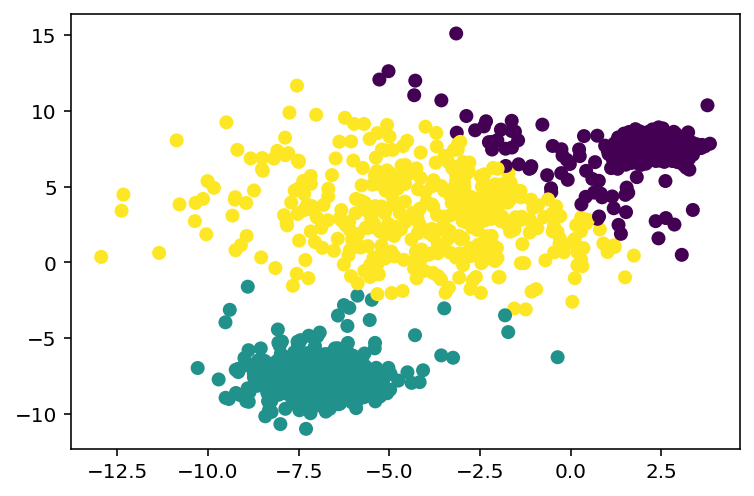

In [ ]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_varied) 
plt.scatter(X_varied[:,0], X_varied[:,1], c = centroid_idx)

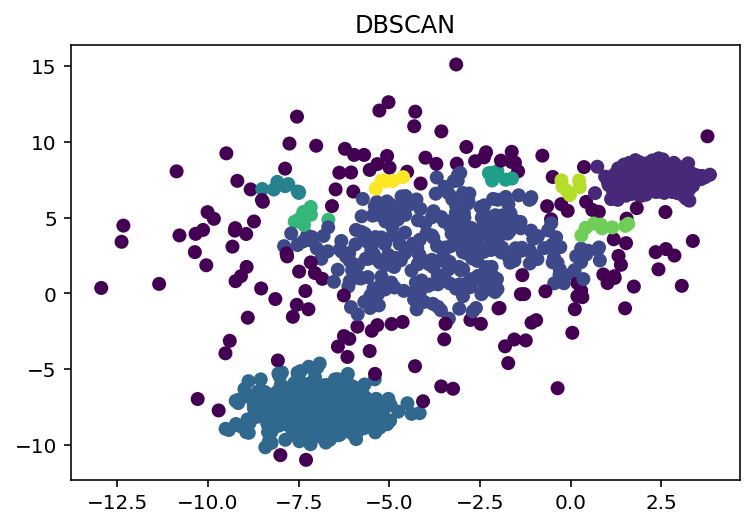

In [ ]:
db = DBSCAN(eps= 0.6, min_samples= 5).fit(X_varied) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_varied,db.labels_,"DBSCAN")

This is the opposite situation we see in Q6, because all the point that is close to each other, many point is reachable to each other so we can see DBSCAN is not make sense in here. However, K mean have nothing to do with paths and size of neighborhood, is all about center and the distance from point to center, so even some points is very close to each others, but because they more closer to different center, the algothrim will split those points to different clusters.

# Q8 Blobs with outliers 

Repeat the previous study on this dataset.

In [ ]:
def generate_gaussian_blobs_outliers(n_samples):
    X, y = make_blobs(n_samples=n_samples, centers=3, n_features=2, random_state=172)
    X_outlier = random.choices(np.arange(-50, 50, 0.01), k=60)
    X_outlier = np.reshape(X_outlier, (30,2))
    y_outlier = np.asarray([4] * 30)
    X = np.concatenate((X, X_outlier), axis=0)
    y = np.concatenate((y, y_outlier))  
    return X, y, "Gaussian blobs"

In [ ]:
X_outlier, _, _ = generate_gaussian_blobs_outliers(500)

In [ ]:
chosen_eps_ranges = [1, 2, 3, 4, 5] # student should fill in those values
chosen_min_samples_ranges = [2, 5, 10, 20]    # student should fill in those values

DBSCAN_params = grid_search(X_outlier, eps_ranges = chosen_eps_ranges, min_samples_ranges = chosen_min_samples_ranges) 

Estimated number of clusters: 3
Estimated number of noise points: 32
Estimated number of clusters: 2
Estimated number of noise points: 30
Estimated number of clusters: 4
Estimated number of noise points: 25
Estimated number of clusters: 4
Estimated number of noise points: 23
Estimated number of clusters: 4
Estimated number of noise points: 23
Estimated number of clusters: 3
Estimated number of noise points: 33
Estimated number of clusters: 2
Estimated number of noise points: 30
Estimated number of clusters: 2
Estimated number of noise points: 29
Estimated number of clusters: 2
Estimated number of noise points: 28
Estimated number of clusters: 2
Estimated number of noise points: 28
Estimated number of clusters: 3
Estimated number of noise points: 37
Estimated number of clusters: 2
Estimated number of noise points: 30
Estimated number of clusters: 2
Estimated number of noise points: 29
Estimated number of clusters: 2
Estimated number of noise points: 28
Estimated number of clusters: 2
Es

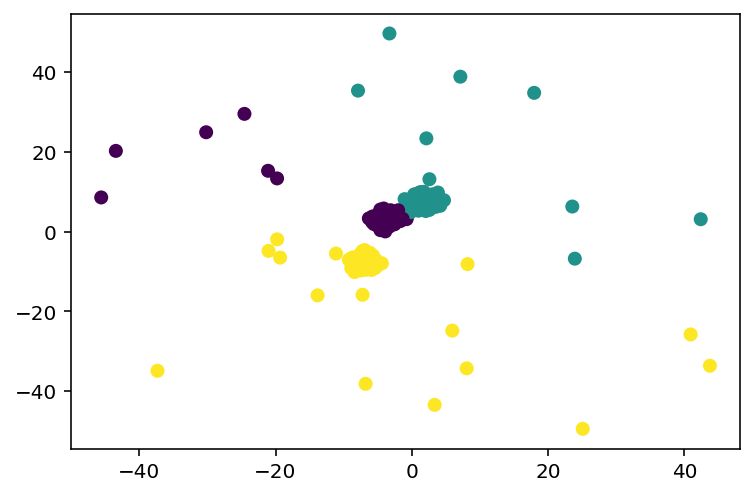

In [ ]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_outlier) 
plt.scatter(X_outlier[:,0], X_outlier[:,1], c = centroid_idx)

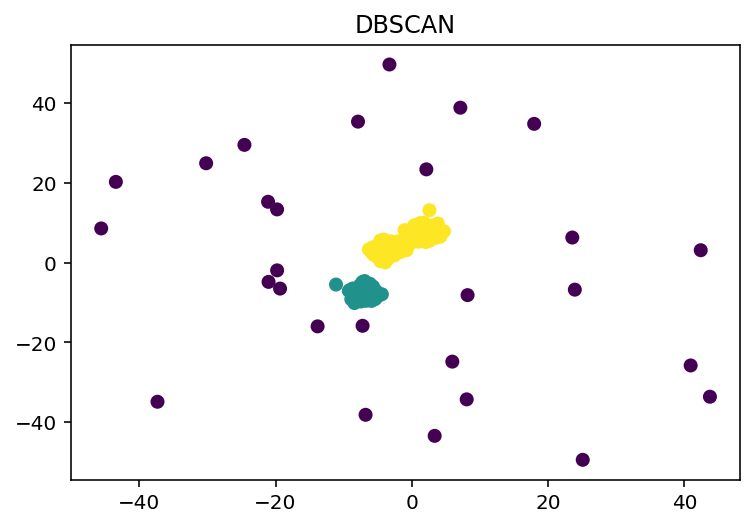

In [ ]:
db = DBSCAN(eps= 5,min_samples= 20).fit(X_outlier) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_outlier,db.labels_,"DBSCAN")

we see DBSCAN is better for datasets that have many noise that is random generated, because most of them are unreachable so the algothrim easy to defined them


# Q9 Concentric circles with noise 

Repeat the previous study on this dataset. 

In [ ]:
n_samples = 500
noisy_circles = make_circles(n_samples=n_samples, factor=0.4, noise=0.065)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)

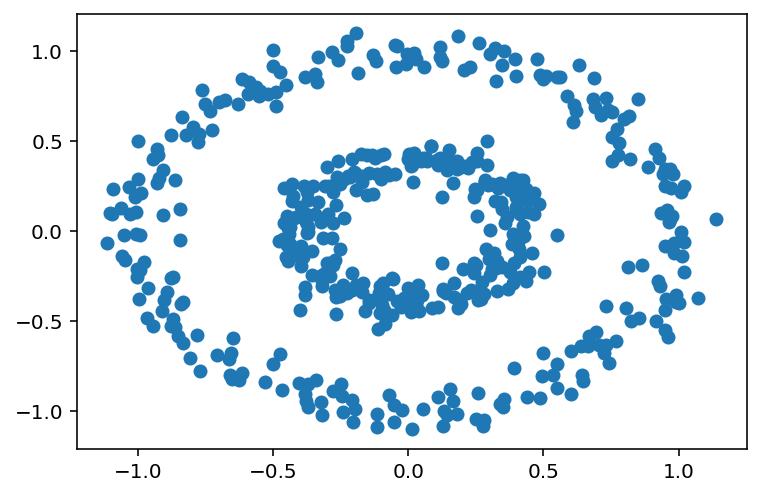

In [ ]:
X_circles, y_circles = noisy_circles 
plt.scatter(X_circles[:, 0], X_circles[:, 1])

In [ ]:
chosen_eps_ranges = [0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22] # student should fill in those values
chosen_min_samples_ranges = [2, 5, 10, 20]    # student should fill in those values

DBSCAN_params = grid_search(X_circles, eps_ranges = chosen_eps_ranges, min_samples_ranges = chosen_min_samples_ranges ) 

Estimated number of clusters: 62
Estimated number of noise points: 60
Estimated number of clusters: 31
Estimated number of noise points: 26
Estimated number of clusters: 12
Estimated number of noise points: 5
Estimated number of clusters: 2
Estimated number of noise points: 3
Estimated number of clusters: 2
Estimated number of noise points: 2
Estimated number of clusters: 2
Estimated number of noise points: 0
Estimated number of clusters: 2
Estimated number of noise points: 0
Estimated number of clusters: 2
Estimated number of noise points: 0
Estimated number of clusters: 2
Estimated number of noise points: 0
Estimated number of clusters: 18
Estimated number of noise points: 232
Estimated number of clusters: 22
Estimated number of noise points: 98
Estimated number of clusters: 17
Estimated number of noise points: 34
Estimated number of clusters: 3
Estimated number of noise points: 8
Estimated number of clusters: 2
Estimated number of noise points: 4
Estimated number of clusters: 2
Esti

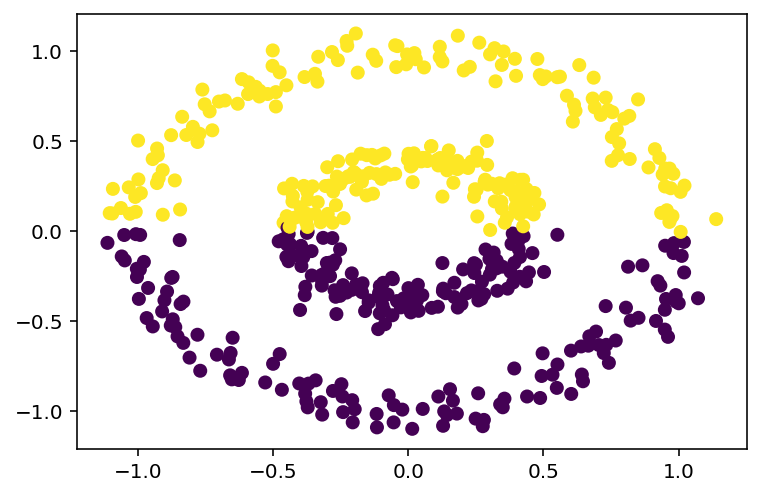

In [ ]:
my_kmean = my_KMeans(n_clusters=2) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_circles) 
plt.scatter(X_circles[:,0], X_circles[:,1], c = centroid_idx)

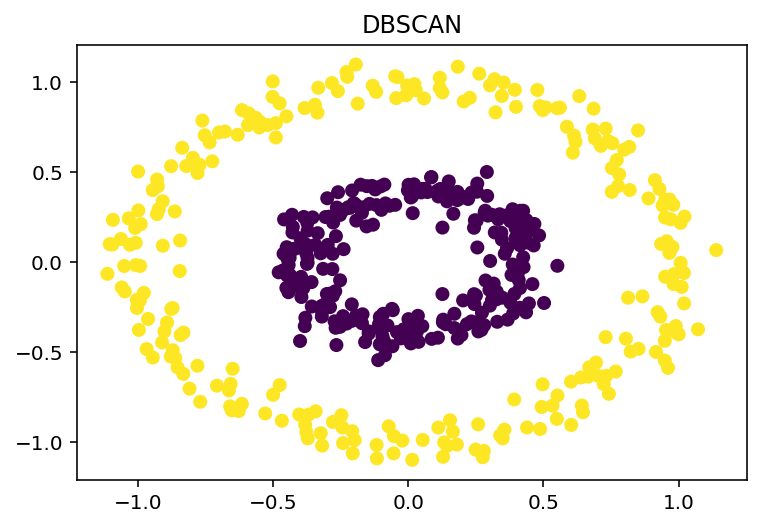

In [ ]:
db = DBSCAN(eps= 0.22,min_samples= 10).fit(X_circles) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_circles,db.labels_,"DBSCAN")

Since all the point is 'connect' together, is easy for DBSCAN to cluster them point to point.